# Modelos de Machine Learning
Após a falha nos testes de modelos de ML com redução da dimensionalidade na etapa anterior, foi realizado o treinamento dos modelos de machine learning com o dataset completo. Para tanto, foi utilizado o Google Colab devido a limitações de hardware da máquina local.

In [35]:
import numpy as np
import sklearn
from scipy import sparse
from google.colab import drive

In [36]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Carregamento dos datasets de treino e teste

In [37]:
X_train = sparse.load_npz('drive/MyDrive/''Colab Notebooks''/X_train_blc_sparse.npz')

In [38]:
y_train = np.loadtxt('drive/MyDrive/''Colab Notebooks''/y_train_balanced.csv', delimiter=',')

In [39]:
X_test = sparse.load_npz('drive/MyDrive/''Colab Notebooks''/X_test_sparse.npz')

In [40]:
y_test = np.loadtxt('drive/MyDrive/''Colab Notebooks''/y_test.csv', delimiter=',')

## Escolha do modelo de machine learning
Na primeira etapa, de acordo com a recomendação do scikit-learn, foram testados os algoritmos Linear SVC e Naive Bayes, que apresentaram acurácia de 55% e 48%, respectivamente.

Nesta etapa serão testados mais modelos de ML para comparação de desempenho.

## Modelo KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
mod_knn = KNeighborsClassifier()

In [43]:
%%time
mod_knn.fit(X_train, y_train)

CPU times: user 133 ms, sys: 11 ms, total: 144 ms
Wall time: 144 ms


KNeighborsClassifier()

### Teste do modelo KNN

In [44]:
%%time
mod_knn.score(X_test, y_test)

CPU times: user 9.36 s, sys: 27.9 ms, total: 9.39 s
Wall time: 9.38 s


0.485456369107322

In [45]:
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


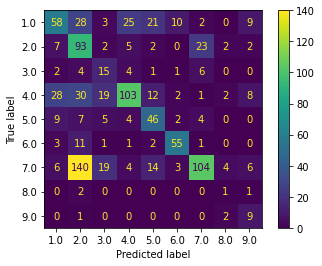

In [46]:
plot_confusion_matrix(mod_knn, X_test, y_test);

### Grid search para otimização do KNN.

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
knn = KNeighborsClassifier()

In [59]:
param = {'n_neighbors': [3, 5, 7, 10]}
param

{'n_neighbors': [3, 5, 7, 10]}

In [60]:
clf = GridSearchCV(knn, param, scoring='accuracy')

In [61]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 10]}, scoring='accuracy')

In [62]:
clf.cv_results_

{'mean_fit_time': array([0.04103408, 0.04160619, 0.04146881, 0.04105458]),
 'mean_score_time': array([11.82881565, 11.83156581, 11.81916418, 11.86284246]),
 'mean_test_score': array([0.75890997, 0.77626371, 0.76282067, 0.7475076 ]),
 'param_n_neighbors': masked_array(data=[3, 5, 7, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 10}],
 'rank_test_score': array([3, 1, 2, 4], dtype=int32),
 'split0_test_score': array([0.69217687, 0.72108844, 0.70918367, 0.68537415]),
 'split1_test_score': array([0.71173469, 0.72959184, 0.71938776, 0.70748299]),
 'split2_test_score': array([0.76340426, 0.77021277, 0.75574468, 0.74297872]),
 'split3_test_score': array([0.78978723, 0.81957447, 0.80425532, 0.79659574]),
 'split4_test_score': array([0.83744681, 0.84085106, 0.82553191, 0.80510638]),
 'std_fit_time': array([0.00149513, 0.00179186, 0.0011704 , 0.

In [63]:
clf.best_params_

{'n_neighbors': 5}

In [64]:
clf.best_score_

0.7762637139962368

In [65]:
knn_best = clf.best_estimator_

In [66]:
# Testando com o dataset de teste
knn_best.score(X_test, y_test)

0.485456369107322

Nota-se que o algoritmo KNN não apresenta vantagens de acurácia em relação aos outros dois modelos testados anteriormente. **Interessante observar pela matriz de confusão que o erro está muito concentrado na categoria 2**.

## Modelo RandomForest

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
mod_RF = RandomForestClassifier()

In [69]:
mod_RF.fit(X_train, y_train)

RandomForestClassifier()

In [70]:
mod_RF.score(X_test, y_test)

0.6509528585757272

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


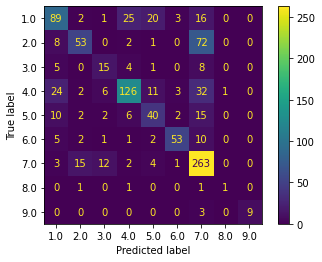

In [71]:
plot_confusion_matrix(mod_RF, X_test, y_test)

O modelo de RandomForest apresentou um aumento de acurácia em relação aos modelos anteriores testados. A próximo passo é verificar se este modelo pode ser otimizado através do GridSearch.

### Otimização do RandomForest através do GridSearch

In [72]:
RF = RandomForestClassifier()

In [73]:
param = {'n_estimators': [50, 100, 500]}

In [74]:
clf = GridSearchCV(RF, param, scoring='accuracy')

In [75]:
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 500]}, scoring='accuracy')

In [76]:
clf.best_params_

{'n_estimators': 500}

In [77]:
clf.best_score_

0.8465502967144303

In [78]:
RF_best = clf.best_estimator_

In [79]:
RF_best.score(X_test, y_test)

0.6569709127382146

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


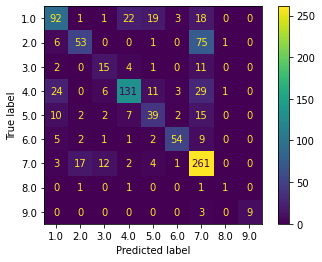

In [80]:
plot_confusion_matrix(RF_best, X_test, y_test);

A otimização com o grid search conseguiu melhorar em 0,6% a acurácia do modelo random forest original, resultando no total de 65,7% de acurácia para o modelo de 500 árvores.